<a href="https://colab.research.google.com/github/AkshayRai20/Projects1/blob/main/Akshay_Team_6_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Structure**
1. Introduction to the data
2. Assumptions made
3. The four dimensions we have explored
4. Codes 
5. Conclusions


**Assumptions Box**
1. Rows where the ADR reads zero but the status reads 'check-out' have been ignored

2. Rows where the number of people sums up to zero, including adults, babies and children have not been considered

3. ADR has been kept flat even for larger groups for simplicity



# The Four Dimensions 

NOTE: Codes might not follow the sequence of questions as the final set is still being finalized


**Bookings**
1. What is the percentage of booking for each year?
2. Most booked accomodation type?
3. Distribution of ADR?
4. How much do guests pay for a room per night?
5. How long do people stay at the hotels
6. Bookings by market segment?
7. What do the weekend vs. weekday look like for resort hotels?
8. Does parking have an impact on bookings for resort hotels?

**Cancellations**
1. How many booking were cancelled?
2. Effect of lead time on cancellations?
3. Effect of deposit type on cancellations?
4. Effect of ADR on cancellations?

**Demography**
1. From which country most guest are coming?
2. Which country brings in the most revenue?

**Seasonality**
1. Which month has the least traffic?
2. How does the price per night vary over the year?
3. Which month have the highest number of cancelations?

**Others**
1. Which category has the highest number of special requests?
2. Does children have an impact on the number of special requests made?








**Preparing and exploration of data**


In [6]:
#Initialization##
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv("/content/drive/My Drive/Cohort Aravali/CohortAravali-201005-153433.zip (Unzipped Files)/AlmaBetter/Module 2/Week 1/hotel_bookings.csv")

df.head(3)

In [8]:
###Checking for relation between 'is_cancelled' and 'reservation_status'###
df[['is_canceled','reservation_status']][0:150] 

,is_canceled,reservation_status
0,0,Check-Out
1,0,Check-Out
2,0,Check-Out
3,0,Check-Out
4,0,Check-Out
...,...,...
145,0,Check-Out
146,0,Check-Out
147,0,Check-Out
148,1,Canceled


In [9]:
###Countries###
df['country'].unique() 

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [10]:
##Types of meals##
df['meal'].unique()  

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
##Different market segments##
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [12]:
##Different distribution channels##
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [13]:
##Values of repeated guests##
df['is_repeated_guest'].unique()

array([0, 1])

In [14]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


In [15]:
##Different types of rooms##
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [16]:
###Checking for relation between ADR and room types###
df[['reserved_room_type','assigned_room_type','adr']] 

,reserved_room_type,assigned_room_type,adr
0,C,C,0.00
1,C,C,0.00
2,A,C,75.00
3,A,A,75.00
4,A,A,98.00
...,...,...,...
119385,A,A,96.14
119386,E,E,225.43
119387,D,D,157.71
119388,A,A,104.40


In [17]:
###Checking for relation between agents and companies####
df[['agent','company','market_segment']]

,agent,company,market_segment
0,NaN,NaN,Direct
1,NaN,NaN,Direct
2,NaN,NaN,Direct
3,304.0,NaN,Corporate
4,240.0,NaN,Online TA
...,...,...,...
119385,394.0,NaN,Offline TA/TO
119386,9.0,NaN,Online TA
119387,9.0,NaN,Online TA
119388,89.0,NaN,Online TA


In [18]:
###Checking for relation between kids and special requests####
df[['babies','children','total_of_special_requests']]  

,babies,children,total_of_special_requests
0,0,0.0,0
1,0,0.0,0
2,0,0.0,0
3,0,0.0,0
4,0,0.0,1
...,...,...,...
119385,0,0.0,0
119386,0,0.0,2
119387,0,0.0,4
119388,0,0.0,0


In [19]:
df.iloc[119387]

hotel                             City Hotel
is_canceled                                0
lead_time                                 34
arrival_date_year                       2017
arrival_date_month                    August
arrival_date_week_number                  35
arrival_date_day_of_month                 31
stays_in_weekend_nights                    2
stays_in_week_nights                       5
adults                                     2
children                                   0
babies                                     0
meal                                      BB
country                                  DEU
market_segment                     Online TA
distribution_channel                   TA/TO
is_repeated_guest                          0
previous_cancellations                     0
previous_bookings_not_canceled             0
reserved_room_type                         D
assigned_room_type                         D
booking_changes                            0
deposit_ty

In [ ]:
###Checking for null values in the dataframe###
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
is_canceled                            0
market_segment                         0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
babies                                 0
meal                                   0
reservation_status_date                0
distribution_channel                   0
reservation_status                     0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes 

In [25]:
#Removal of null values#
new_df=df.dropna(subset=['children', 'adults','babies'])

1. How many bookings were cancelled? and cancellation factor over the years?

In [50]:
##Hotel cancellation over two years##
grouped=new_df.groupby('arrival_date_year')
grouped1=grouped['is_canceled'].agg(np.count_nonzero)
grouped2=grouped['is_canceled'].count()
grouped3=grouped1,grouped2
grouped3

(arrival_date_year
 2015     8138
 2016    20337
 2017    15745
 Name: is_canceled, dtype: int64, arrival_date_year
 2015    21992
 2016    56707
 2017    40687
 Name: is_canceled, dtype: int64)

In [ ]:
new_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
sns.set_context('paper')

In [ ]:
yr_percent_df = (new_df['arrival_date_year'].value_counts(normalize=True).mul(100).reset_index()).rename(columns ={'index':'Year','arrival_date_year':'booking_percent'})

In [ ]:
yr_percent_df

,Year,booking_percent
0,2016,47.498869
1,2017,34.080210
2,2015,18.420920


In [ ]:
new_df.corr().loc['children','total_of_special_requests']

0.08174482206809368

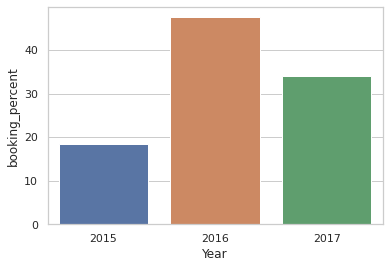

In [ ]:
ax = sns.barplot(x="Year", y="booking_percent", data=yr_percent_df)

3. Correlation between no. of children and special request

In [ ]:
new_df.corr().loc['children','total_of_special_requests']

0.08174482206809368

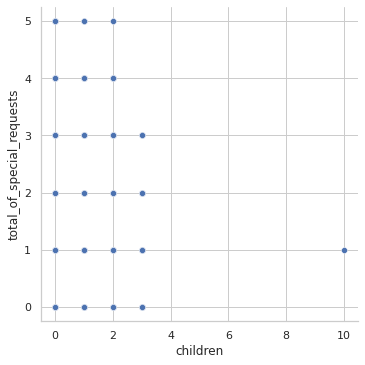

In [ ]:
sns.relplot(x="children", y="total_of_special_requests", data=new_df)

# 4. From which country most guests are coming?

In [ ]:
top10_countries = new_df[new_df['is_canceled']==0]['country'].value_counts()[0:10]
top10_countries_new = top10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top10_countries_new

,country,number_of_bookings
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


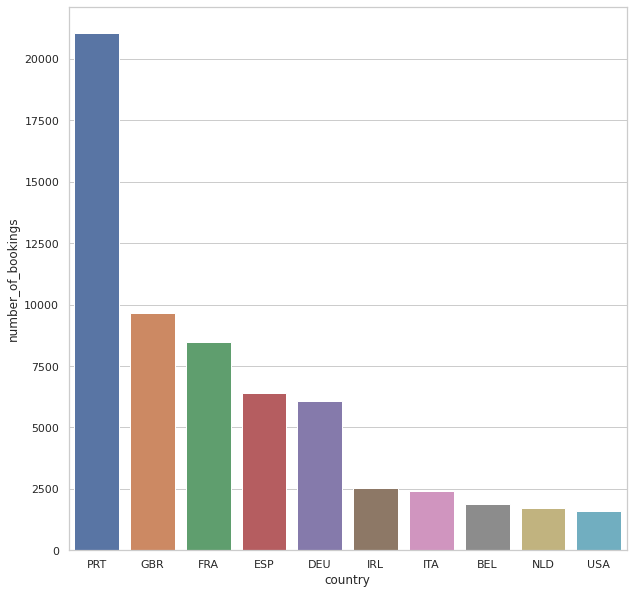

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="country", y="number_of_bookings", data=top10_countries_new)

5. Months with least traffic and break 

In [ ]:
month_df = new_df[new_df['is_canceled']==0]['arrival_date_month'].value_counts()[0:10].reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8638
1,July,7919
2,May,7114
3,October,6914
4,March,6645
5,April,6565
6,June,6404
7,September,6392
8,February,5372
9,November,4672


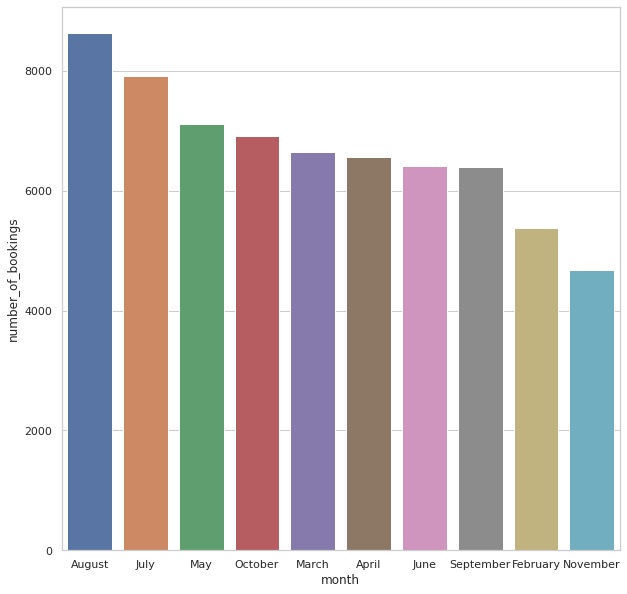

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


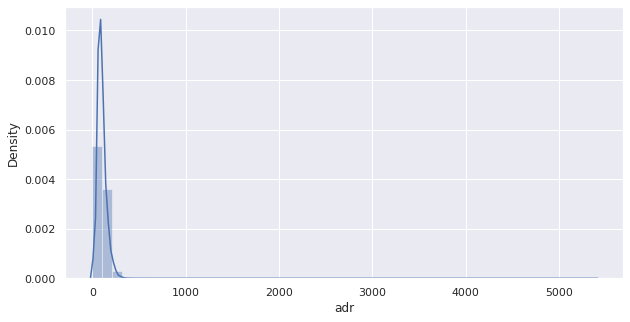

In [51]:
#Distribution of ADR to check for outliers
plt.figure(figsize=(10,5))
ax = sns.distplot(new_df['adr'])


In [70]:
#Calculate IQR and remove the outlier
# Computing IQR
Q1 = new_df['adr'].quantile(0.25)
Q3 = new_df['adr'].quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1-(1.5*IQR)
higher_limit=Q3+(1.5*IQR)
new_df2=new_df[new_df.adr<=higher_limit]


In [73]:
higher_limit

211.065

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


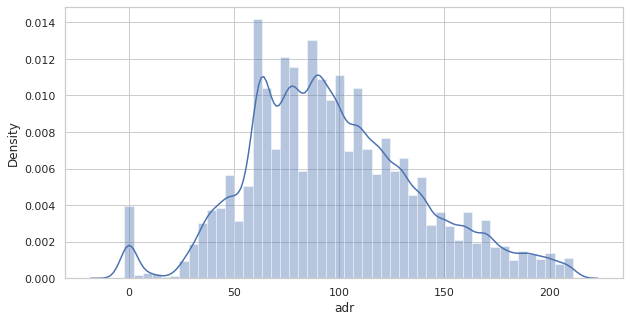

In [71]:
plt.figure(figsize=(10,5))
ax = sns.distplot(new_df2['adr'])

Most booked accomodation type


In [75]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [81]:

grouped_acc=new_df.groupby('reserved_room_type')
for acc, acc_df in grouped_acc:
  print(acc_df)




               hotel  is_canceled  ...  reservation_status  reservation_status_date
2       Resort Hotel            0  ...           Check-Out               2015-07-02
3       Resort Hotel            0  ...           Check-Out               2015-07-02
4       Resort Hotel            0  ...           Check-Out               2015-07-03
5       Resort Hotel            0  ...           Check-Out               2015-07-03
8       Resort Hotel            1  ...            Canceled               2015-05-06
...              ...          ...  ...                 ...                      ...
119383    City Hotel            0  ...           Check-Out               2017-09-06
119384    City Hotel            0  ...           Check-Out               2017-09-06
119385    City Hotel            0  ...           Check-Out               2017-09-06
119388    City Hotel            0  ...           Check-Out               2017-09-07
119389    City Hotel            0  ...           Check-Out               201

In [86]:
grouped_acc_count=grouped_acc['reserved_room_type'].count()
grouped_acc_count




reserved_room_type
A    85994
B     1114
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: reserved_room_type, dtype: int64